**`Load Package`**

In [1]:
# load function
source('./Seurat_Function.R')
# load package
options(stringsAsFactors = F)
for(i in pg){suppressMessages(library(i, character.only = T))}
# set memery and core number
options(future.globals.maxSize = 20 * 1024^3) 
plan(multicore, workers = 12)

## `2. Integration with Seurat`

**`Load h5ad Data and convert to seurat`**

In [2]:
getAnywhere(convert_h5ad_to_seuratv5)

A single object matching ‘convert_h5ad_to_seuratv5’ was found
It was found in the following places
  .GlobalEnv
with value

function (h5ad_path = "", output_dir = "", prefix_name = "", 
    include_all_assays = FALSE, save = TRUE, verbose = TRUE) 
{
    if (!file.exists(h5ad_path)) 
        stop("The specified .h5ad file does not exist.")
    if (!dir.exists(output_dir)) 
        stop("The specified output directory does not exist.")
    if (is.null(prefix_name) || prefix_name == "") 
        stop("The 'prefix_name' argument is missing or empty.")
    base_name <- tools::file_path_sans_ext(basename(h5ad_path))
    h5seurat_path <- sub("\\.h5ad$", ".h5seurat", h5ad_path)
    if (verbose) 
        cat("Converting .h5ad to .h5seurat...\n")
    Convert(h5ad_path, dest = "h5seurat", overwrite = TRUE, assay = "RNA", 
        filename = h5seurat_path)
    if (verbose) 
        cat("Detecting available assays...\n")
    get_available_assays <- function(h5seurat_path) {
        h5_structure <- 

In [14]:
h5ad_path = '../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI.h5ad'

obj <- convert_h5ad_to_seuratv5(h5ad_path = h5ad_path,
    output_dir = '../Data/raw_seurat/',
    prefix_name = 'Immune_human_alldata_integration_harmony_scanorama_scVI',
    include_all_assays = TRUE,
    save = TRUE,
    verbose = TRUE
)

Converting .h5ad to .h5seurat...


Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_harmoney_umap as cell embeddings for harmoney_umap

Adding X_harmony as cell embeddings for harmony

Adding X_pca as cell embeddings for pca

Adding X_pca_umap as cell embeddings for pca_umap

Adding X_scVI as cell embeddings for scVI

Adding X_scVI_umap as cell embeddings for scVI_umap

Adding X_scanorama as cell embeddings for scanorama

Adding X_scanorama_umap as cell embeddings for scanorama_umap

Adding X_umap as cell embeddings for umap

Adding scaled|original|X_pca as cell embeddings for scaled|original|X_pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding batch_colors to miscellaneous data

Adding final_annotation_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding log1p to miscellaneous data

Adding pca_neighbours

Detecting available assays...
Found assays: RNA 


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction harmoney_umap

Adding cell embeddings for harmoney_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmoney_umap_ to harmoneyumap_”
Adding miscellaneous information for harmoney_umap

Adding reduction harmony

Adding cell embeddings for harmony

Adding miscellaneous information for harmony

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_umap

Adding cell embeddings for pca_umap

Adding miscellaneous information for pca_umap

Warning message:
“Key ‘PC_’ taken, using ‘pcaumap_’ instead”
Adding reduction scVI

Adding cell embeddings for scVI

Adding miscellaneous information for scVI

Adding reduction scVI_umap

Adding cell embeddings for scVI_umap

Warning message:
“Keys should be one or more alphanumeric characters fo

Converting assays to Seurat v5 Assay5 format...


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘harmoney_umap’

Updating matrix keys for DimReduc ‘harmony’

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘pca_umap’

Updating matrix keys for DimReduc ‘scVI’

Updating matrix keys for DimReduc ‘scVI_umap’

Updating matrix keys for DimReduc ‘scaled.original.X_pca’

Updating matrix keys for DimReduc ‘scanorama’

Updating matrix keys for DimReduc ‘scanorama_umap’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in harmoney_umap

Setting harmoney_umap DimReduc to global

Updating slots in harmony

Updating slots in pca

Updating slots in pca_umap

Setting pca_umap DimReduc to global

Updating slots in scVI

Updating slots in scVI_umap

Setting scVI_umap DimReduc to global

Updating slots in scaled.origi

Saved Seurat v5 object to: ../Data/raw_seurat//Immune_human_alldata_integration_harmony_scanorama_scVI_v5.rds 
Conversion complete. Returning Seurat v5 object.
Removing temporary file: ../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI.h5seurat 


**`2.4 CCA RPCA`**

In [ ]:
obj <- readRDS("../Data/raw_seurat/Immune_human_alldata_integration_harmony_scanorama_scVI_v5.rds")

In [22]:
obj[["RNA"]] <- split(obj[["RNA"]], f = obj$batch)
obj

An object of class Seurat 
8128 features across 25507 samples within 1 assay 
Active assay: RNA (8128 features, 0 variable features)
 20 layers present: counts.Oetjen_A, counts.Oetjen_P, counts.Oetjen_U, counts.Freytag, counts.10X, counts.Sun_sample1_CS, counts.Sun_sample2_KC, counts.Sun_sample3_TB, counts.Sun_sample4_TC, counts.Villani, data.Oetjen_A, data.Oetjen_P, data.Oetjen_U, data.Freytag, data.10X, data.Sun_sample1_CS, data.Sun_sample2_KC, data.Sun_sample3_TB, data.Sun_sample4_TC, data.Villani
 14 dimensional reductions calculated: cca, cca_umap, harmoney_umap, harmony, pca, pca_umap, rpca, rpca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [23]:
obj <- NormalizeData(obj)
obj <- FindVariableFeatures(obj)
obj <- ScaleData(obj)
# obj <- RunPCA(obj)

Normalizing layer: counts.Oetjen_A

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Oetjen_P

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Oetjen_U

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Freytag

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.10X

Normalizing layer: counts.Sun_sample1_CS

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Sun_sample2_KC

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Sun_sample3_TB

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Normalizing layer: counts.Sun_sample4_TC

Warning messag

In [24]:
obj <- IntegrateLayers(
  object = obj, method = CCAIntegration,
  orig.reduction = "pca", new.reduction = "cca",
  verbose = FALSE
)

In [25]:
obj <- RunUMAP(obj, reduction = "cca", dims = 1:30, reduction.name = "cca_umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:37:34 UMAP embedding parameters a = 0.9922 b = 1.112

16:37:34 Read 25507 rows and found 30 numeric columns

16:37:34 Using Annoy for neighbor search, n_neighbors = 30

16:37:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:37:39 Writing NN index file to temp file /tmp/RtmpSi0mZ7/filedc07d12c6fb49

16:37:39 Searching Annoy index using 12 threads, search_k = 3000

16:37:41 Annoy recall = 100%

16:37:45 Commencing smooth kNN distance calibration using 12 threads
 with target n_neigh

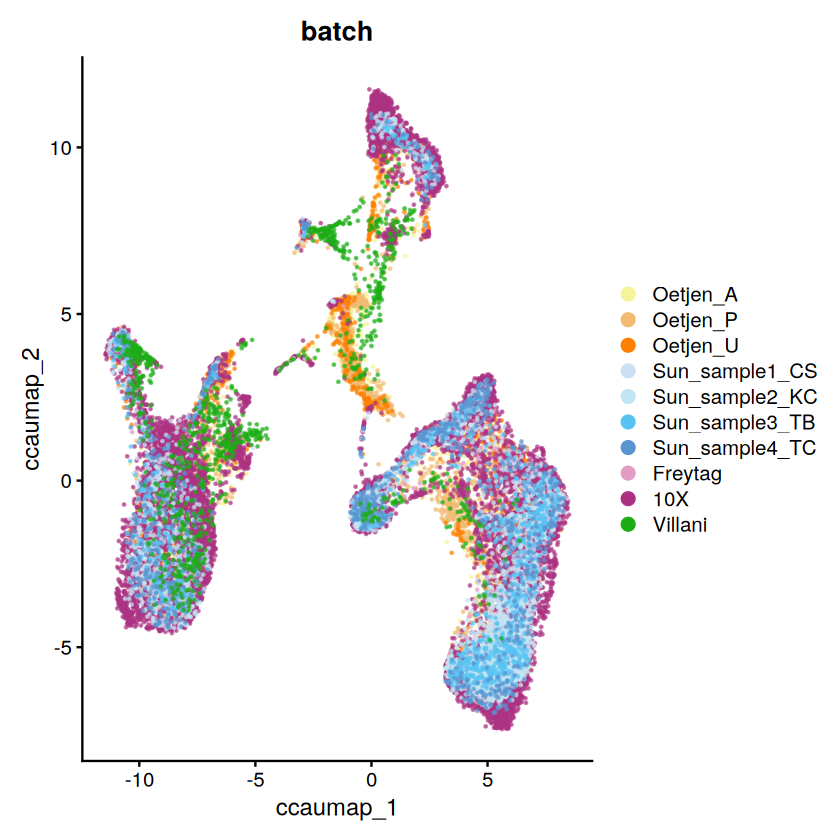

In [28]:
DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "cca_umap",pt.size = 0.1, alpha = c(0.6))

In [25]:
obj <- IntegrateLayers(
  object = obj, method = RPCAIntegration,
  orig.reduction = "pca", new.reduction = "rpca",
  verbose = FALSE
)

In [27]:
# obj <- RunUMAP(obj, reduction = "cca", dims = 1:30, reduction.name = "cca_umap")
obj <- RunUMAP(obj, reduction = "rpca", dims = 1:30, reduction.name = "rpca_umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:40:21 UMAP embedding parameters a = 0.9922 b = 1.112

14:40:21 Read 25507 rows and found 30 numeric columns

14:40:21 Using Annoy for neighbor search, n_neighbors = 30

14:40:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:40:26 Writing NN index file to temp file /tmp/RtmphgWapr/file2b6a3212261c4d

14:40:26 Searching Annoy index using 12 threads, search_k = 3000

14:40:28 Annoy recall = 100%

14:40:30 Commencing smooth kNN distance calibration using 12 threads
 with target n_neig

In [29]:
saveRDS(obj,"../Data/raw_seurat/Immune_human_alldata_integration_harmony_scanorama_scVI_cca_rpca_v5.rds")

In [31]:
write.csv(Embeddings(obj[["cca"]]), file = "../Data/raw_seurat/cca_pca.csv")
write.csv(Embeddings(obj[["rpca"]]), file = "../Data/raw_seurat/rpca_pca.csv")
write.csv(Embeddings(obj[["cca_umap"]]), file = "../Data/raw_seurat/cca_umap.csv")
write.csv(Embeddings(obj[["rpca_umap"]]), file = "../Data/raw_seurat/rpca_umap.csv")

**`3. Visualization`**

In [3]:
h5ad_path = '../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama.h5ad'

obj <- convert_h5ad_to_seuratv5(h5ad_path = h5ad_path,
    output_dir = '../Data/raw_seurat/',
    prefix_name = 'human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama',
    include_all_assays = TRUE,
    save = TRUE,
    verbose = TRUE
)

Converting .h5ad to .h5seurat...


Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_cca as cell embeddings for cca

Adding X_cca_umap as cell embeddings for cca_umap

Adding X_harmoney_umap as cell embeddings for harmoney_umap

Adding X_harmony as cell embeddings for harmony

Adding X_pca as cell embeddings for pca

Adding X_pca_umap as cell embeddings for pca_umap

Adding X_rpca as cell embeddings for rpca

Adding X_rpca_umap as cell embeddings for rpca_umap

Adding X_scVI as cell embeddings for scVI

Adding X_scVI_umap as cell embeddings for scVI_umap

Adding X_scanorama as cell embeddings for scanorama

Adding X_scanorama_umap as cell embeddings for scanorama_umap

Adding X_umap as cell embeddings for umap

Adding scaled|original|X_pca as cell embeddings for scaled|original|X_pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap



Detecting available assays...
Found assays: RNA 


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction cca

Adding cell embeddings for cca

Adding miscellaneous information for cca

Adding reduction cca_umap

Adding cell embeddings for cca_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from cca_umap_ to ccaumap_”
Adding miscellaneous information for cca_umap

Adding reduction harmoney_umap

Adding cell embeddings for harmoney_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmoney_umap_ to harmoneyumap_”
Adding miscellaneous information for harmoney_umap

Adding reduction harmony

Adding cell embeddings for harmony

Adding miscellaneous information for harmony

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_umap

Adding cell embeddings for pca_umap

A

Converting assays to Seurat v5 Assay5 format...


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘cca’

Updating matrix keys for DimReduc ‘cca_umap’

Updating matrix keys for DimReduc ‘harmoney_umap’

Updating matrix keys for DimReduc ‘harmony’

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘pca_umap’

Updating matrix keys for DimReduc ‘rpca’

Updating matrix keys for DimReduc ‘rpca_umap’

Updating matrix keys for DimReduc ‘scVI’

Updating matrix keys for DimReduc ‘scVI_umap’

Updating matrix keys for DimReduc ‘scaled.original.X_pca’

Updating matrix keys for DimReduc ‘scanorama’

Updating matrix keys for DimReduc ‘scanorama_umap’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in cca

Updating slots in cca_umap

Setting cca_umap DimReduc to global

Updating slots in harmoney_umap

Setting harmon

Saved Seurat v5 object to: ../Data/raw_seurat//human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama_v5.rds 
Conversion complete. Returning Seurat v5 object.
Removing temporary file: ../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama.h5seurat 


In [11]:
# obj <- readRDS("../Data/raw_seurat/Immune_human_alldata_integration_harmony_scanorama_scVI_cca_rpca_v5.rds")

In [4]:
obj

An object of class Seurat 
8128 features across 25507 samples within 1 assay 
Active assay: RNA (8128 features, 0 variable features)
 2 layers present: counts, data
 14 dimensional reductions calculated: cca, cca_umap, harmoney_umap, harmony, pca, pca_umap, rpca, rpca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [5]:
obj@meta.data$celltype <- factor(
  obj@meta.data$final_annotation,
  levels = c("HSPCs","Monocyte progenitors","Monocytes",
  "Monocyte-derived dendritic cells","Plasmacytoid dendritic cells", 
  "Erythroid progenitors", "Megakaryocyte progenitors", "Erythrocytes",
  "CD4+ T cells", "CD8+ T cells","NKT cells",  "NK cells",
  "B cells", "Plasma cells")
)
palette_clusters <- c(
  "#20b2aa","#e88ebf","#e01276", 
  "#f6f7a1", "#dbc902", 
  "#5a95d1", "#ff7f00","#e01212", 
  "#1cad15", "#b2df8a","#87a86a", "#e6b000", 
  "#a37d00", "#995202"
)

In [6]:
obj@meta.data$batch <- factor(
  obj@meta.data$batch,
  levels = c('Oetjen_A','Oetjen_P','Oetjen_U',
             'Sun_sample1_CS','Sun_sample2_KC','Sun_sample3_TB','Sun_sample4_TC',
             'Freytag','10X','Villani')
)
palette_batch <- c('#F7F398','#F1BB72', '#ff7f00',
  '#CCE0F5','#C1E6F3','#57C3F3','#5a95d1',
  '#E59CC4', '#AB3282','#1cad15'
)

In [7]:
obj@meta.data$chemistry <- factor(
  obj@meta.data$chemistry,
  levels = c('v2_10X','v3_10X','10X','smart-seq2')
)
palette_tech <- c("#5a95d1","#20b2aa","#e01276","#ff7f00")

In [8]:
pca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "pca_umap") + ggtitle("Unintegrated")

scanorama_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scanorama_umap") + ggtitle("Scanorama (Latent space)")

scVI_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scVI_umap") + ggtitle("scVI (Latent space)")

harmoney_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "harmoney_umap") + ggtitle("Harmony (Latent space)")

cca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "cca_umap") + ggtitle("Seurat v3 CCA (Feature Matrix)")

rpca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "rpca_umap") + ggtitle("Seurat v3 RPCA (Feature Matrix)")


In [9]:
batch_pca_umap <- DimPlot(obj,cols = palette_batch, group.by = "batch", reduction = "pca_umap",pt.size = 0.1, alpha = c(0.6)) + ggtitle("Unintegrated")

batch_scanorama_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scanorama_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")

batch_scVI_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scVI_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("scVI (Latent space)")

batch_harmoney_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "harmoney_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Harmony (Latent space)")

batch_cca_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "cca_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 CCA (Feature Matrix)")

batch_rpca_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "rpca_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 RPCA (Feature Matrix)")


In [10]:
tech_pca_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "pca_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Unintegrated")

tech_scanorama_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "scanorama_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")

tech_scVI_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "scVI_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("scVI (Latent space)")

tech_harmoney_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "harmoney_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Harmony (Latent space)")

tech_cca_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "cca_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 CCA (Feature Matrix)")

tech_rpca_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "rpca_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 RPCA (Feature Matrix)")


In [11]:
library(cowplot)
library(ggplot2)
library(gridExtra)

get_legend <- function(myggplot) {
  tmp <- ggplotGrob(myggplot)
  legend <- gtable::gtable_filter(tmp, "guide-box")
  return(legend)
}

legend <- get_legend(rpca_umap)

plots_no_legend <- list(
  pca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  scanorama_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  scVI_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  harmoney_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  cca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  rpca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank())
)

plot_row <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
final_plot <- plot_grid(plot_row, legend, nrow = 1, rel_widths = c(5, 0.5))
ggsave("../Analysis/Integration_all_immune_human_all_tools_umap_by_celltype_no_axis.pdf", plot = final_plot, width = 25, height = 4)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




In [12]:
batch_legend <- get_legend(batch_rpca_umap)

batch_plots_no_legend <- list(
  batch_pca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  batch_scanorama_umap + theme(legend.position = "none",
                               axis.title = element_blank(),
                               axis.text = element_blank(),
                               axis.ticks = element_blank(),
                               axis.line = element_blank()),
  batch_scVI_umap + theme(legend.position = "none",
                          axis.title = element_blank(),
                          axis.text = element_blank(),
                          axis.ticks = element_blank(),
                          axis.line = element_blank()),
  batch_harmoney_umap + theme(legend.position = "none",
                              axis.title = element_blank(),
                              axis.text = element_blank(),
                              axis.ticks = element_blank(),
                              axis.line = element_blank()),
  batch_cca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  batch_rpca_umap + theme(legend.position = "none",
                          axis.title = element_blank(),
                          axis.text = element_blank(),
                          axis.ticks = element_blank(),
                          axis.line = element_blank())
)

batch_plot_row <- plot_grid(plotlist = batch_plots_no_legend, nrow = 1, align = "h")

batch_final_plot <- plot_grid(batch_plot_row, batch_legend, nrow = 1, rel_widths = c(5, 0.5))

ggsave("../Analysis/Integration_all_immune_human_all_tools_umap_by_batch_no_axis.pdf",
       plot = batch_final_plot, width = 25, height = 4)


In [13]:
library(cowplot)
library(ggplot2)
library(gridExtra)

tech_legend <- get_legend(tech_rpca_umap)

tech_plots_no_legend <- list(
  tech_pca_umap + theme(legend.position = "none",
                        axis.title = element_blank(),
                        axis.text = element_blank(),
                        axis.ticks = element_blank(),
                        axis.line = element_blank()),
  tech_scanorama_umap + theme(legend.position = "none",
                              axis.title = element_blank(),
                              axis.text = element_blank(),
                              axis.ticks = element_blank(),
                              axis.line = element_blank()),
  tech_scVI_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  tech_harmoney_umap + theme(legend.position = "none",
                             axis.title = element_blank(),
                             axis.text = element_blank(),
                             axis.ticks = element_blank(),
                             axis.line = element_blank()),
  tech_cca_umap + theme(legend.position = "none",
                        axis.title = element_blank(),
                        axis.text = element_blank(),
                        axis.ticks = element_blank(),
                        axis.line = element_blank()),
  tech_rpca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank())
)

tech_plot_row <- plot_grid(plotlist = tech_plots_no_legend, nrow = 1, align = "h")

tech_final_plot <- plot_grid(tech_plot_row, tech_legend, nrow = 1, rel_widths = c(5, 0.6))

ggsave("../Analysis/Integration_all_immune_human_all_tools_umap_by_tech_no_axis.pdf",
       plot = tech_final_plot, width = 25, height = 4)


In [36]:
saveRDS(obj,"../Data/raw_seurat/Immune_human_alldata_visualization_redoscanorama_v5.rds")

In [97]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9554665,510.3,14366401,767.3,14366401,767.3
Vcells,196625393,1500.2,455729666,3477.0,455729424,3477.0


**`findcluster and dotplot`**

In [1]:
obj <- readRDS("../Data/raw_seurat/Immune_human_alldata_visualization_redoscanorama_v5.rds")

In [14]:
obj

An object of class Seurat 
8128 features across 25507 samples within 1 assay 
Active assay: RNA (8128 features, 0 variable features)
 2 layers present: counts, data
 14 dimensional reductions calculated: cca, cca_umap, harmoney_umap, harmony, pca, pca_umap, rpca, rpca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [15]:
reductions <- c("cca", "harmony", "pca", "rpca", "scVI", "scanorama")
dims_to_use <- 1:30
res <- 0.8
for (red in reductions) {
  cat("Clustering using", red, "...\n")
  obj <- FindNeighbors(obj, reduction = red, dims = dims_to_use, verbose = FALSE)
  obj <- FindClusters(obj, resolution = res, verbose = FALSE)
  cluster_col <- paste0("cluster_", red)
  obj[[cluster_col]] <- Idents(obj)
}
head(obj@meta.data[, grep("cluster_", colnames(obj@meta.data))])

Clustering using cca ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Clustering using harmony ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Clustering using pca ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Clustering using rpca ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Clustering using scVI ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Clustering using scanorama ...


Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


,cluster_cca,cluster_harmony,cluster_pca,cluster_rpca,cluster_scVI,cluster_scanorama
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCTGCAGCGAACA-1-Oetjen_A,9,8,17,7,8,5
AAACCTGCATGTCCTC-1-Oetjen_A,0,0,1,0,1,15
AAACCTGGTCGACTGC-1-Oetjen_A,3,3,7,2,0,12
AAACCTGGTCGCTTCT-1-Oetjen_A,3,2,7,2,0,7
AAACCTGTCCCGACTT-1-Oetjen_A,1,1,9,1,5,10
AAACGGGAGGGCACTA-1-Oetjen_A,3,2,7,2,0,11


In [16]:
unique(obj@meta.data$cluster_pca)

[1] 17 1  7  9  8  12 22 24 18 20 30 13 14 32 27 2  6  15 10 5  4  3  0  11 29
[26] 19 21 28 31 26 23 25 16
33 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 32

In [17]:
# feat_HSPC = c("KIT")
# feat_MonoProg = c("CSF1R", "CD33")
# feat_Mono = c("CD14", "FCGR3A")
# feat_DC = c()
# feat_pDC = c("CLEC4C")
# feat_EryProg = c()
# feat_Mega = c("ITGA2B")
# feat_Ery = c("HBA1")
# feat_CD4T = c("CD4")
# feat_CD8T = c("CD8A")
# feat_NKT = c("KLRB1")
# feat_NK = c( "NKG7")
# feat_B = c("CD19", "MS4A1")
# feat_Plasma = c("MZB1")

# genes_to_check = list(
#   HSPC = feat_HSPC,
#   MonocyteProgenitors = feat_MonoProg,
#   Monocytes = feat_Mono,
#   DC = feat_DC,
#   pDC = feat_pDC,
#   ErythroidProgenitors = feat_EryProg,
#   MegakaryocyteProgenitors = feat_Mega,
#   Erythrocytes = feat_Ery,
#   CD4_T = feat_CD4T,
#   CD8_T = feat_CD8T,
#   NKT = feat_NKT,
#   NK = feat_NK,
#   B = feat_B,
#   Plasma = feat_Plasma
# )


genes_to_check <- list(
  HSPC     = c("KIT"),
  Mono_Prog = c("CSF1R", "CD33"),
  Monocytes = c("CD14", "FCGR3A", "LYZ"),
  DC       = c("IRF4", "CD74"),
  pDC      = c("CLEC4C", "IRF7"),
  Ery_Prog = c("NFE2", "TAL1"),
  Mega_Prog = c("ITGA2B","MYL9","CD9"),
  Ery = c("HBA1", "FECH"),
  CD4_T    = c("CD4", "IL7R"),
  CD8_T    = c("CD8A", "PRF1"),
  NKT      = c("KLRB1", "TYROBP"),
  NK       = c("NKG7", "KLRD1"),
  B        = c("CD19", "MS4A1", "CD79A"),
  Plasma   = c("MZB1")
)

In [18]:
cluster_cols <- c("cluster_pca", "cluster_scanorama", "cluster_scVI", 
                  "cluster_harmony", "cluster_rpca",  "cluster_cca") 

output_dir <- "../Analysis/dotplots_by_cluster_pdf"
dir.create(output_dir, showWarnings = FALSE)

# 循环绘图并保存为 PDF
for (cluster_col in cluster_cols) {
  message("Processing: ", cluster_col)
  
  p <- DotPlot(obj, assay = "RNA", features = genes_to_check, group.by = cluster_col, dot.scale = 5, cols = "RdYlBu") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 12, face="bold"),
          axis.text.y = element_text(size=12, face="bold"),
          legend.text = element_text(size=12, face="bold"),
          axis.text = element_text(size=6, face="bold"),
          axis.title = element_text(size=10, face="bold"),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    ggtitle(cluster_col)

  # 保存为 PDF
  ggsave(
    filename = file.path(output_dir, paste0("DotPlot_", cluster_col, ".pdf")),
    plot = p,
    width = 20,
    height = 6
  )
}

Processing: cluster_pca

Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Processing: cluster_scanorama

Processing: cluster_scVI

Processing: cluster_harmony

Processing: cluster_rpca

Processing: cluster_cca



In [ ]:
convert_seuratv5_to_anndata(
  condaenv_env = "cmml3_gpu",
  seurat_object = seuratv5,
  file_path = './',
  file_name = 'human_pancreas.h5ad'
)

In [ ]:
getAnywhere(convert_h5ad_to_seuratv5)
getAnywhere(convert_seuratv5_to_anndata)

In [ ]:
library(cowplot)
library(ggplot2)
library(gridExtra)

get_legend <- function(myggplot) {
  tmp <- ggplotGrob(myggplot)
  legend <- gtable::gtable_filter(tmp, "guide-box")
  return(legend)
}

legend <- get_legend(rpca_umap)

plots_no_legend <- list(
  pca_umap + theme(legend.position = "none"),
  scanorama_umap + theme(legend.position = "none"),
  scVI_umap + theme(legend.position = "none"),
  harmoney_umap + theme(legend.position = "none"),
  cca_umap + theme(legend.position = "none"),
  rpca_umap + theme(legend.position = "none")
)

plot_row <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
final_plot <- plot_grid(plot_row, legend, nrow = 1, rel_widths = c(5, 0.8))
# print(plot_row)
ggsave("../Analysis/Integration_all_immune_human_all_tools_umap.pdf", plot = final_plot, width = 30, height = 4)